In [1]:
import pandas as pd
import pathlib
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.motif.utilities import meme_to_pfm_dict, plot_pfm
warnings.filterwarnings('ignore')

In [2]:
oddsratio_cutoff = 1.3
lgp_cutoff = 8

## Motif Info

In [5]:
motif_gene_anno = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/study/MotifClustering/JASPAR2020_CORE_vertebrates_non-redundant.mouse_genes.with_motif_group.csv', 
    index_col=0
)
motif_gene_anno.head()

,motif_name,motif_genes,gene_ids,gene_names,motif_group
motif_uid,,,,,
MA0006.1,Ahr::Arnt,"Ahr,Arnt","ENSMUSG00000019256.17,ENSMUSG00000015522.18","Ahr,Arnt",MotifGroup158
MA0854.1,Alx1,Alx1,ENSMUSG00000036602.14,Alx1,MotifGroup5
MA0634.1,ALX3,ALX3,ENSMUSG00000014603.3,Alx3,MotifGroup5
MA0853.1,Alx4,Alx4,ENSMUSG00000040310.12,Alx4,MotifGroup5
MA0007.3,Ar,Ar,ENSMUSG00000046532.8,Ar,MotifGroup20


## Agg

In [6]:
output_path = f'./SubType.total_enrichment.msg'
output_dir = 'SubType/'
output_dir = pathlib.Path(output_dir)
enrich_files = list(output_dir.glob('*motif_enrichment.msg'))

total_result = pd.concat([pd.read_msgpack(p) for p in enrich_files])

filtered_result = total_result[(total_result['oddsratio'] > oddsratio_cutoff) & 
                               (total_result['-lgp'] > lgp_cutoff)]

motif_gene_info = filtered_result.index.map(lambda i: motif_gene_anno.loc[i])
motif_gene_info = pd.DataFrame(motif_gene_info.tolist())
total_result = pd.concat([filtered_result, motif_gene_info], axis=1)

total_result.to_msgpack(output_path)

In [9]:
total_result.groupby(['SubType', 'DMRType']).apply(lambda i: i['motif_group'].unique().size).unstack()

DMRType,Hyper,Hypo
SubType,,
ANP_anp-dg,13,19
ANP_anp-olf-cnu,13,24
ASC_cortex-olf,13,15
ASC_mid,12,14
ASC_str-hpf,12,15
CA1_Ak5,8,23
CA1_Chrm3,12,14
CA1_Kif26a,18,35
CA1_Lingo2,21,27


In [23]:
sig_records = total_result[total_result['DMRType'] == 'Hypo'].groupby(['SubType', 'motif_group']).apply(
    lambda i: i.sort_values('-lgp', ascending=False).iloc[0][['oddsratio', '-lgp']])


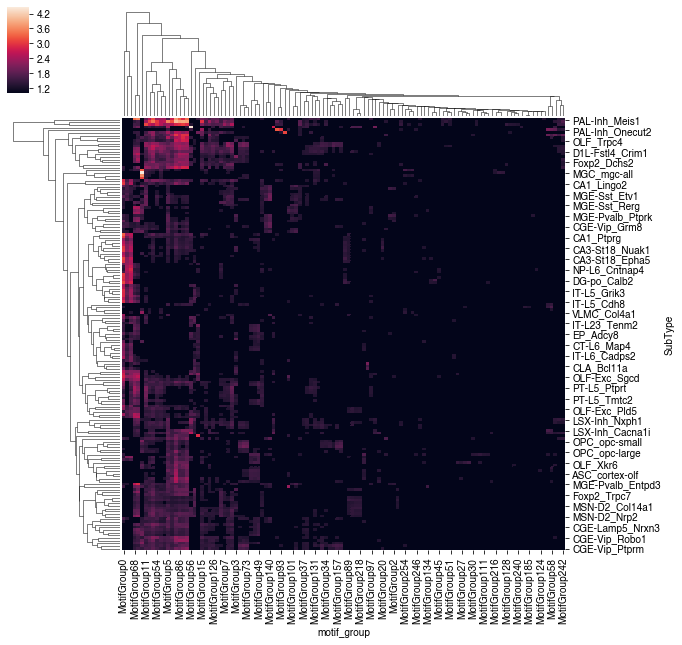

In [27]:
sns.clustermap(sig_records['oddsratio'].unstack().fillna(1))

In [28]:
sig_records['oddsratio'].unstack().shape

(161, 118)